##Wine Quality prediction

In [6]:
import pandas as pd
import numpy as np


In [7]:
df=pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

In [9]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

[]

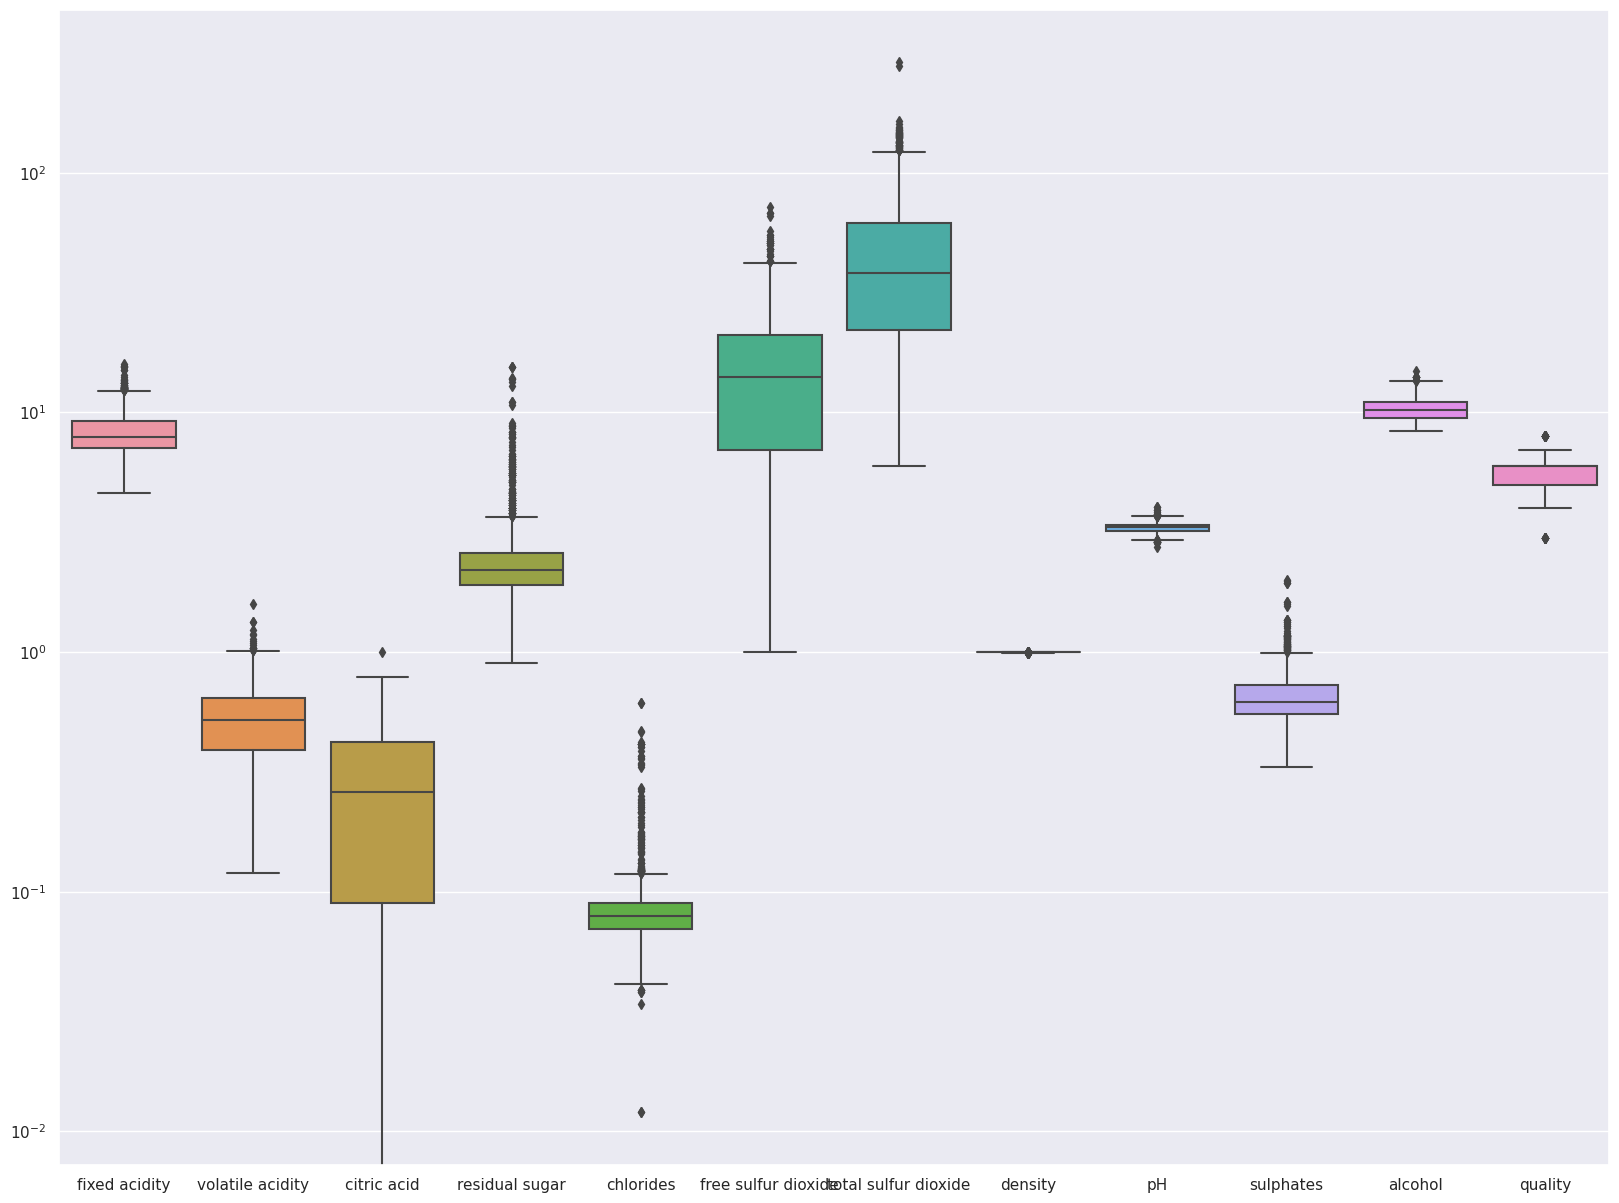

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,15)})
sns.boxplot(data=df)
plt.semilogy()

In [11]:
for x in df.columns:
  q1 = df[x].quantile(0.25) #Q1
  q3 = df[x].quantile(0.75) #Q3
  IQR =q3-q1
  upper_limit = q3+1.5*IQR
  lower_limit=  q3-1.5*IQR
  df[x] = np.where(df[x]>upper_limit,df[x].median(),df[x])
  df[x] = np.where(df[x]<lower_limit,df[x].median(),df[x])

[]

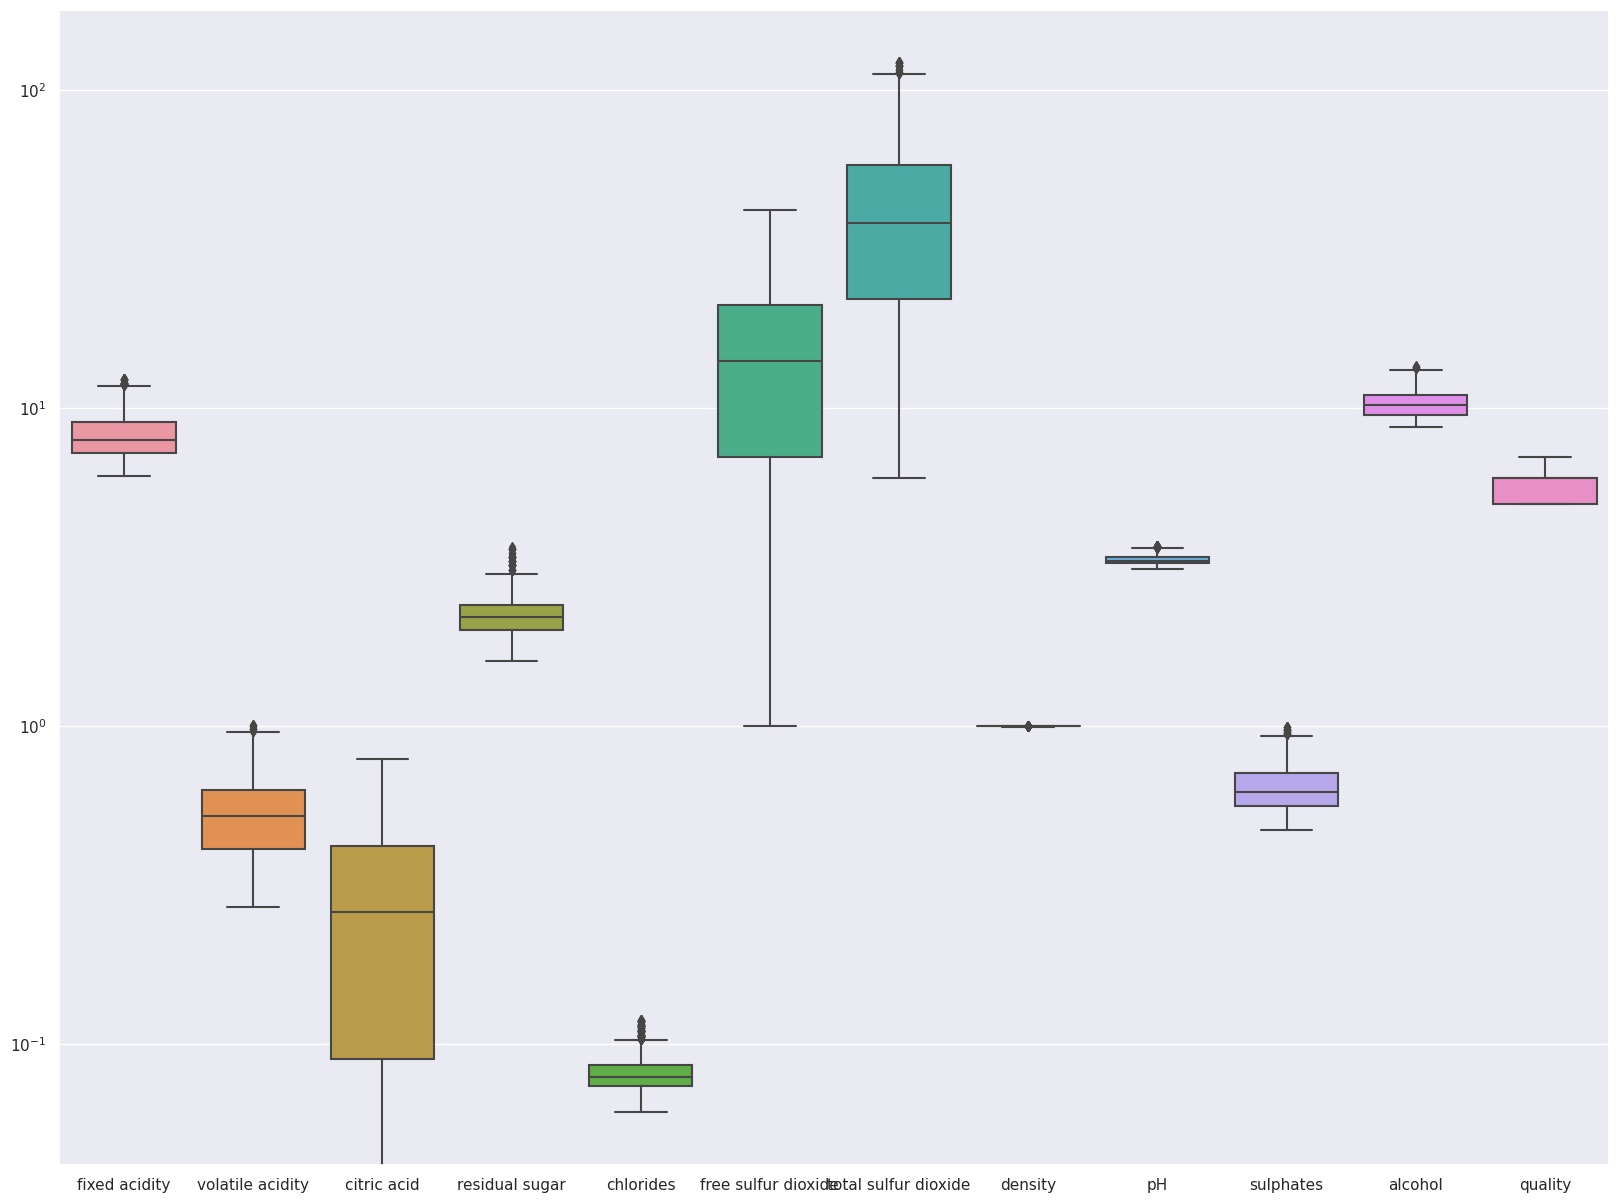

In [12]:
sns.set(rc={'figure.figsize':(20,15)})
sns.boxplot(data=df)
plt.semilogy()

Train spliiting

In [13]:
X=df.drop(columns=['quality'])
X.head()
Y=df.quality

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.7)

In [15]:

print(
X_train.shape,
X_train.head(),
Y_train.shape,
X_train.head())


(479, 11)       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
460             9.2              0.43         0.52            2.30      0.083   
1046            7.6              0.78         0.00            1.70      0.076   
585             7.6              0.51         0.24            2.40      0.091   
1181            9.8              0.39         0.43            1.65      0.068   
1145            8.2              0.52         0.43            2.50      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
460                  14.0                  23.0  0.99760  3.35       0.61   
1046                 33.0                  45.0  0.99612  3.31       0.62   
585                   8.0                  38.0  0.99800  3.47       0.66   
1181                  5.0                  11.0  0.99478  3.19       0.62   
1145                 31.0                  51.0  0.99672  3.53       0.81   

      alcohol  
460      11.3  
1046    

##Linear regression

In [16]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [17]:
model=le.fit(X_train,Y_train)

In [18]:
pred=le.predict(X_test)
pred


array([6.02834282, 5.1962679 , 6.70327912, ..., 5.1560486 , 5.94148242,
       5.97687607])

##Decision Tree classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier



model1 = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')


model1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
d_y_predict = model1.predict(X_test)

In [24]:
d_y_predict_train = model1.predict(X_train)

In [30]:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Testing Accuracy = ', accuracy_score(Y_test,d_y_predict))
print('Training Accuracy = ', accuracy_score(Y_train,d_y_predict_train))

Testing Accuracy =  0.5803571428571429
Training Accuracy =  0.6805845511482255


Test statistics

In [32]:
pd.crosstab(Y_test,d_y_predict)



col_0,5.0,6.0,7.0
quality,,,
5.0,324,152,8
6.0,182,291,37
7.0,14,77,35


In [34]:
print(classification_report(Y_test,d_y_predict))

              precision    recall  f1-score   support

         5.0       0.62      0.67      0.65       484
         6.0       0.56      0.57      0.57       510
         7.0       0.44      0.28      0.34       126

    accuracy                           0.58      1120
   macro avg       0.54      0.51      0.52      1120
weighted avg       0.57      0.58      0.57      1120



In [39]:
model1.predict([[7.5,0.74,0.00,1.5,0.086,9.0,32.0,0.9781,3.1,0.6,9]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5.])